In [1]:
##COMScDSP231-013

## Step 1 | Import libraries & load data set

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data set

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, sep=',', names=column_names, na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Step 2| Dataset Overview

In [3]:
df['cp'].value_counts()

cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64

In [4]:
df['target'].value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [5]:
df.head() # printing first 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on 
# simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

df['target'] = df['target'].replace([2, 3, 4], 1)

In [7]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [8]:
# basic information
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [9]:
df.describe() # obtain statistical parameters

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Step 3| Feature Transformation

In [10]:
df.isna().sum() # checking any missing values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [11]:
# handle the missing values
df.drop_duplicates()
df = df.dropna()


age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


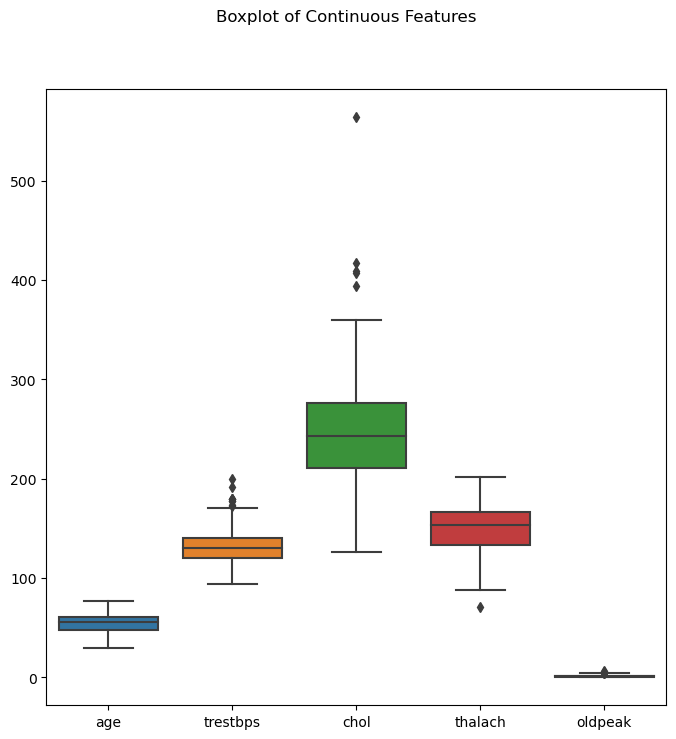

In [12]:
# filter out continous column
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Q1 = df[continuous_columns].quantile(0.25)
Q3 = df[continuous_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_columns] < (Q1 - 1.5 * IQR)) |
(df[continuous_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers_count_specified)

# PLot the boxplot to check the outliers
plt.figure(figsize=(8,8))
sns.boxplot(data=df[continuous_columns])
plt.suptitle('Boxplot of Continuous Features', fontsize=12)
plt.show()

In [13]:
# convert categorical data into interger type
df[['age','sex','cp','trestbps','chol', 'fbs','restecg','thalach','exang','slope','ca','thal']] = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int32  
 1   sex       297 non-null    int32  
 2   cp        297 non-null    int32  
 3   trestbps  297 non-null    int32  
 4   chol      297 non-null    int32  
 5   fbs       297 non-null    int32  
 6   restecg   297 non-null    int32  
 7   thalach   297 non-null    int32  
 8   exang     297 non-null    int32  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int32  
 11  ca        297 non-null    int32  
 12  thal      297 non-null    int32  
 13  target    297 non-null    int64  
dtypes: float64(1), int32(12), int64(1)
memory usage: 20.9 KB


C:\Users\hansaniY\AppData\Local\Temp\ipykernel_31020\2206536204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age','sex','cp','trestbps','chol', 'fbs','restecg','thalach','exang','slope','ca','thal']] = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']].astype(int)


Text(0.5, 0.98, 'Correlations among the attributes')

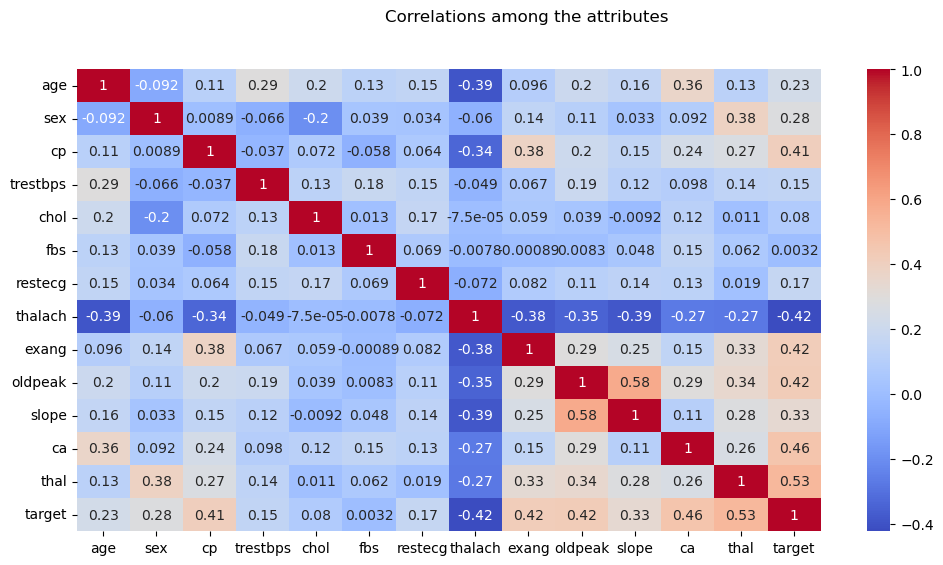

In [14]:
# Finding the correlations among the attributes
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.suptitle('Correlations among the attributes', fontsize=12)

## Step 4 | EDA

C:\Users\hansaniY\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Pairwise Distribution of all Parameters')

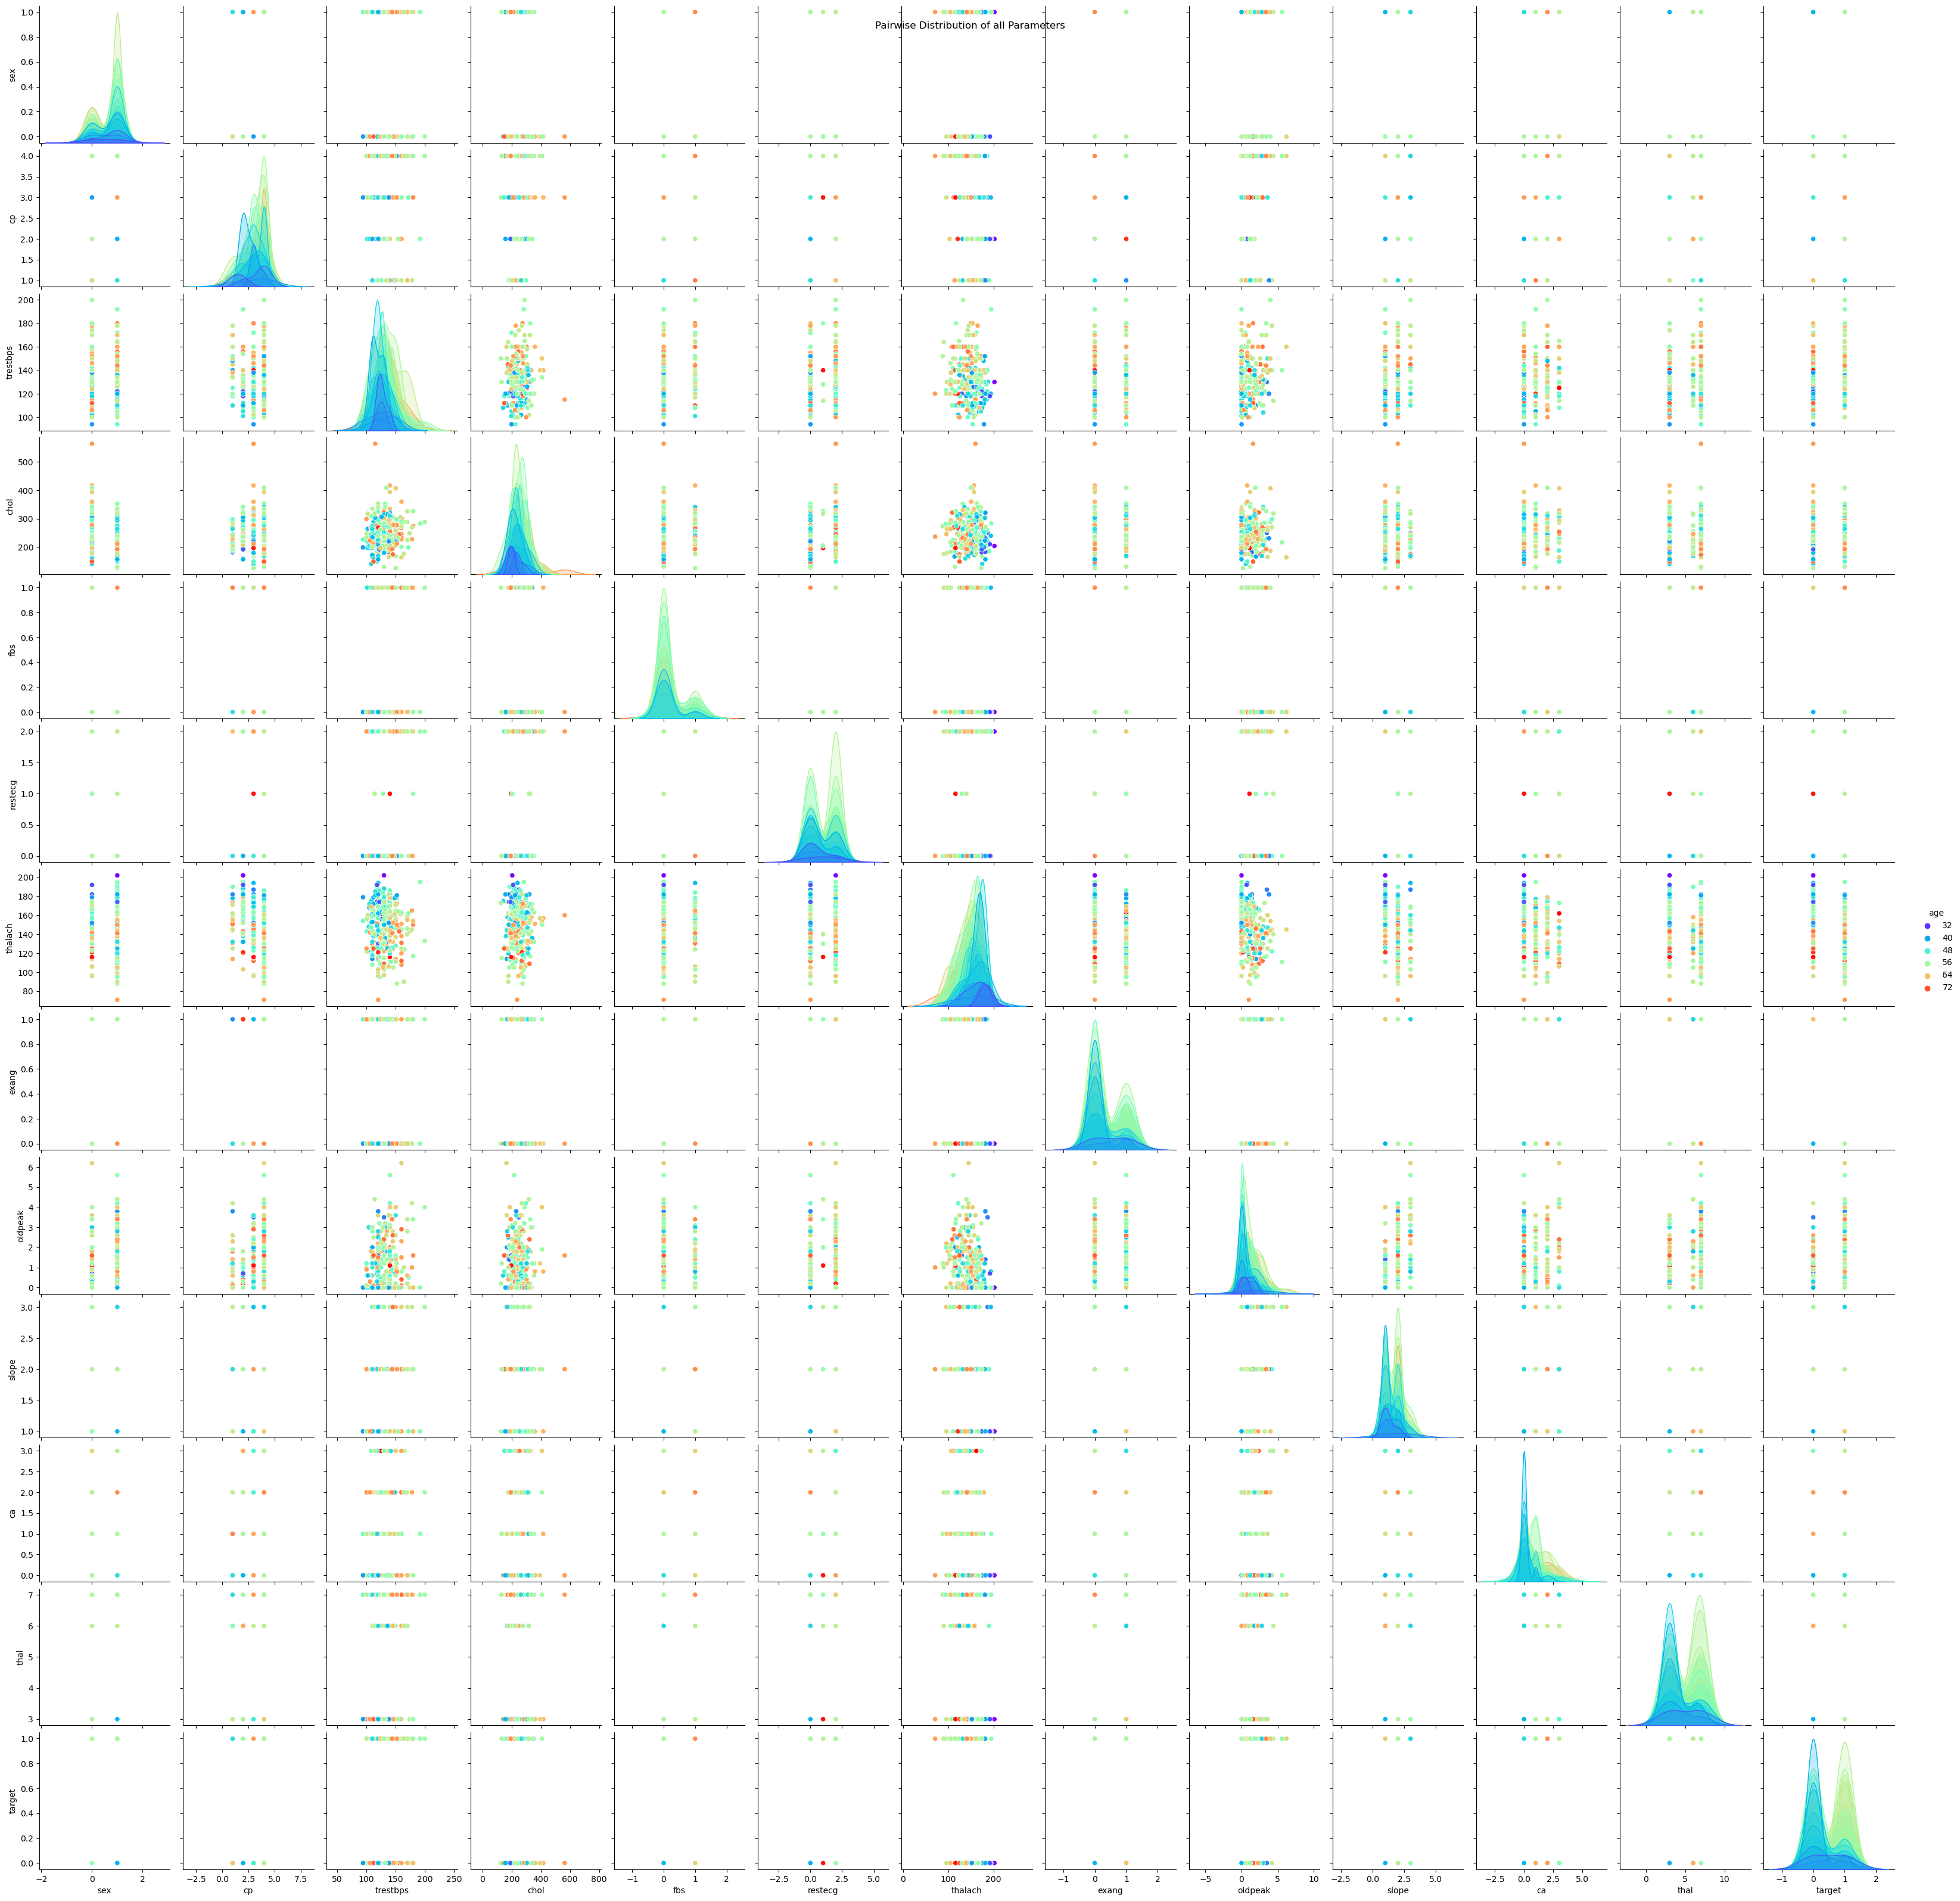

In [15]:
# pairwise distribution of all parameters

sns.pairplot(data=df,hue='age',palette = 'rainbow')
plt.suptitle('Pairwise Distribution of all Parameters', fontsize=12)


### Step 4.1 | Continuous Data Analysis

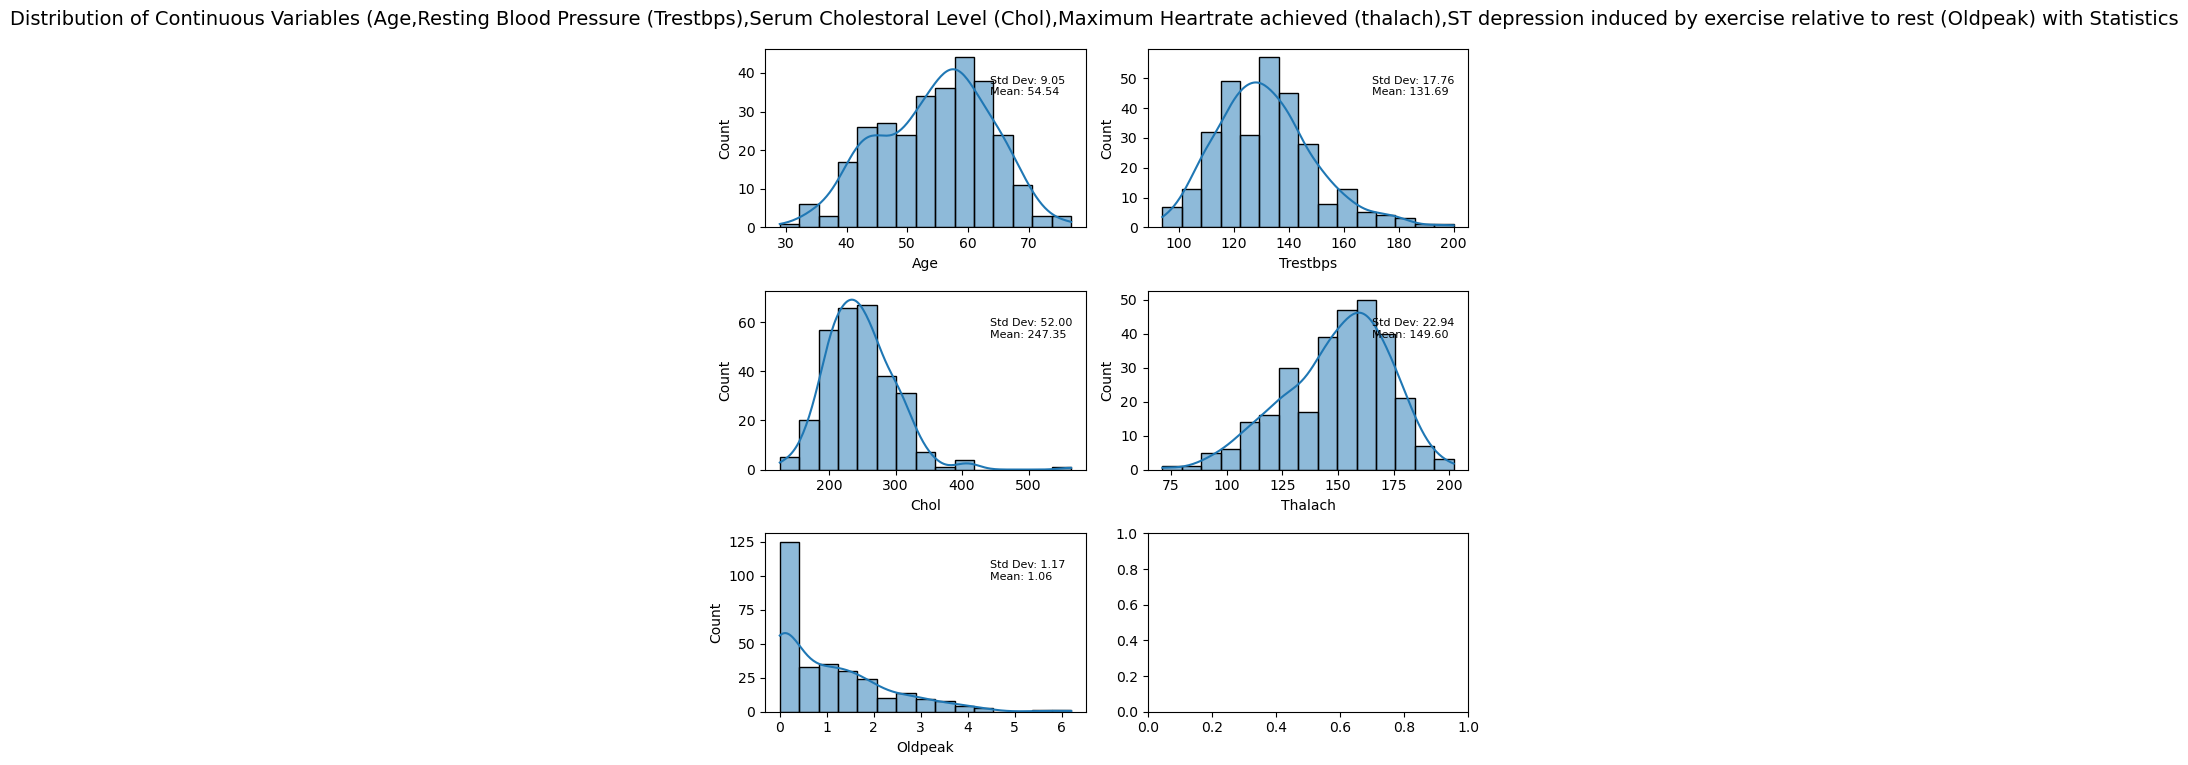

In [16]:
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex','cp', 'fbs', 'restecg', 'ca', 'exang', 'slope', 'thal','target']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

# Loop to plot histograms for each continuous feature
for i, column in enumerate(continuous_columns):
    # Calculate the row and column indices for the subplot
    row_index = i // 2
    col_index = i % 2
    
    # Plot Histogram
    graph = sns.histplot(data=df[column], bins=15, kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_xlabel(f'{column.capitalize()}')
    axes[row_index, col_index].set_ylabel('Count')

    # Annotate with standard deviation, mean, and counts
    std_dev = np.std(df[column], ddof=1)
    mean_val = np.mean(df[column])
    
    # Annotate the subplot with statistics
    axes[row_index, col_index].annotate(f'Std Dev: {std_dev:.2f}\nMean: {mean_val:.2f}', 
                     xy=(0.7, 0.85), xycoords='axes fraction', fontsize=8, ha='left', va='top')

# Set common title for all subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle ('Distribution of Continuous Variables (Age,Resting Blood Pressure (Trestbps),Serum Cholestoral Level (Chol),Maximum Heartrate achieved (thalach),ST depression induced by exercise relative to rest (Oldpeak) with Statistics', fontsize=14)
plt.show()

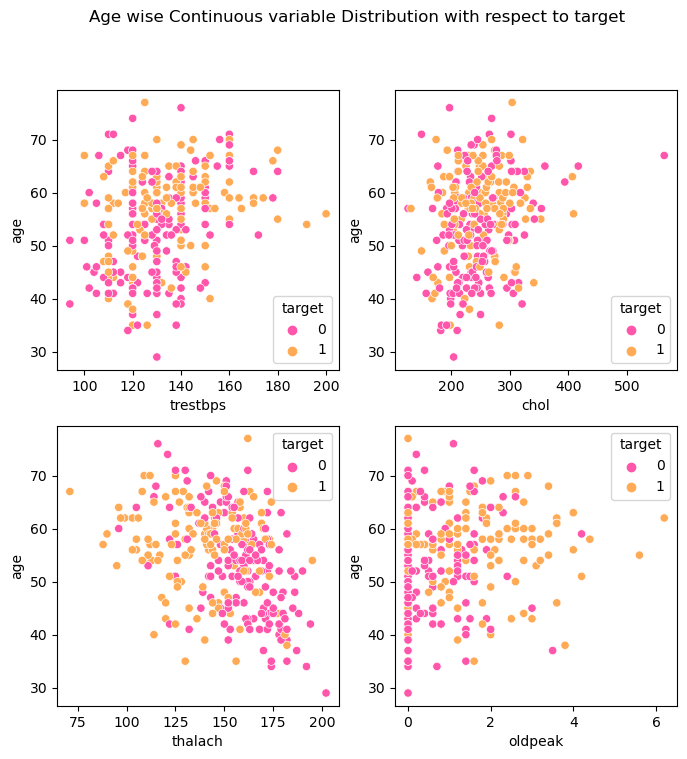

In [17]:
# Age wise Continuous variable distribution with respect to target

continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['sex','cp', 'fbs', 'restecg', 'ca', 'exang', 'slope', 'thal','target']

# remove age in continuous column
con_barplot= ['trestbps', 'chol', 'thalach', 'oldpeak']

# Create subplots for each continuous variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, column in enumerate(con_barplot):
    # Calculate the row and column indices for the subplot
    row_index = i // 2
    col_index = i % 2
    
    # Plot scatterplot for the current continuous variable
    sns.scatterplot(data=df, y='age', x=column, hue='target', palette='spring', ax=axes[row_index, col_index])
    
# Set common title for all subplots
plt.suptitle('Age wise Continuous variable Distribution with respect to target', fontsize=12)
plt.show()

C:\Users\hansaniY\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


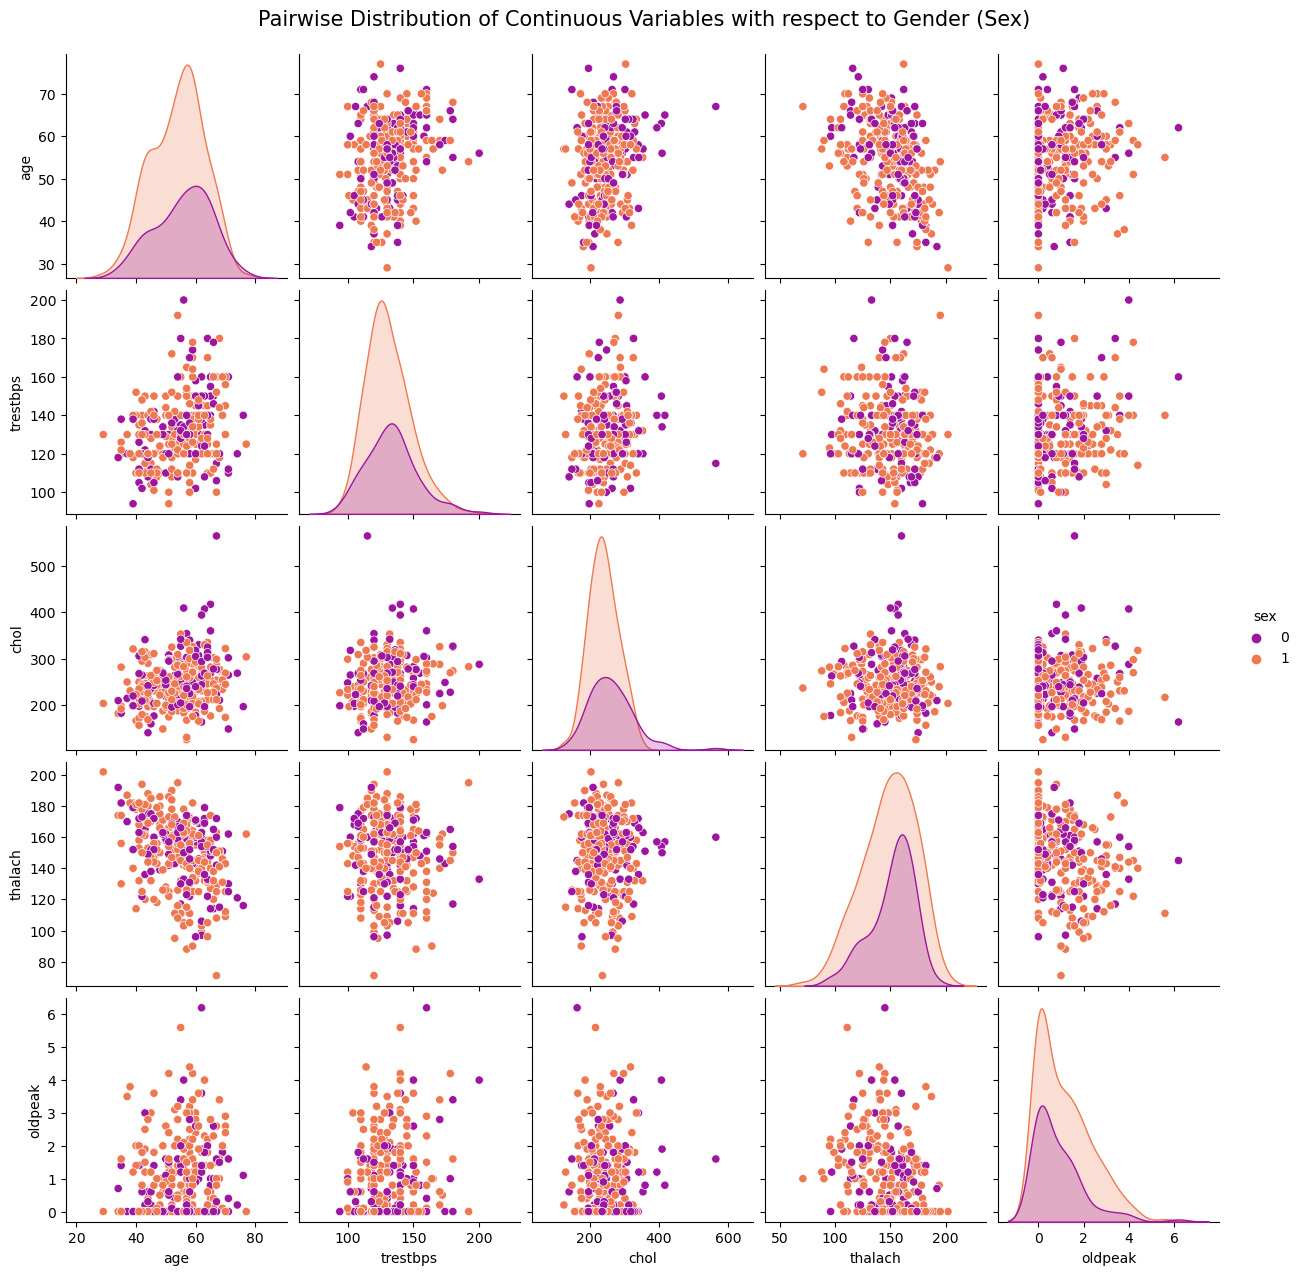

In [18]:
# pairwise distribution of continuous variables with sex

conti_col_vs_cat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex']
sns.pairplot(data=df[conti_col_vs_cat], hue='sex', palette='plasma')
plt.suptitle('Pairwise Distribution of Continuous Variables with respect to Gender (Sex)', y=1.02,fontsize=15)
plt.show()

### Step 4.2 | Categorical Data Analysis

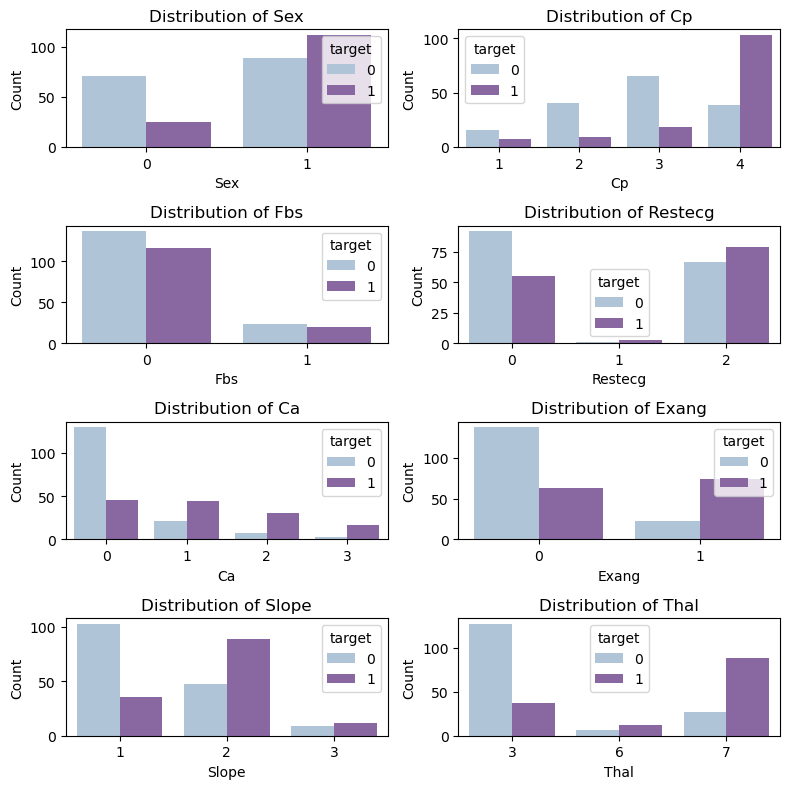

In [19]:
# filter out categorical variables
categorical_columns = ['sex','cp', 'fbs', 'restecg', 'ca', 'exang', 'slope', 'thal']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,8))

for i, column in enumerate(categorical_columns):
    # Calculate the row and column indices for the subplot
    row_index = i // 2
    col_index = i % 2
    
    # Plot barplot
    sns.countplot(data = df, x =column, hue ='target', ax=axes[row_index, col_index],palette='BuPu')
    axes[row_index, col_index].set_title(f'Distribution of {column.capitalize()}')
    axes[row_index, col_index].set_xlabel(column.capitalize())
    axes[row_index, col_index].set_ylabel('Count')


# Adjust layout and show the plots    
plt.tight_layout()
plt.show()

In [20]:
df['thal'].value_counts()

thal
3    164
7    115
6     18
Name: count, dtype: int64

In [21]:
df['ca'].value_counts()

ca
0    174
1     65
2     38
3     20
Name: count, dtype: int64

### Bivariate Analysis (Categorical)

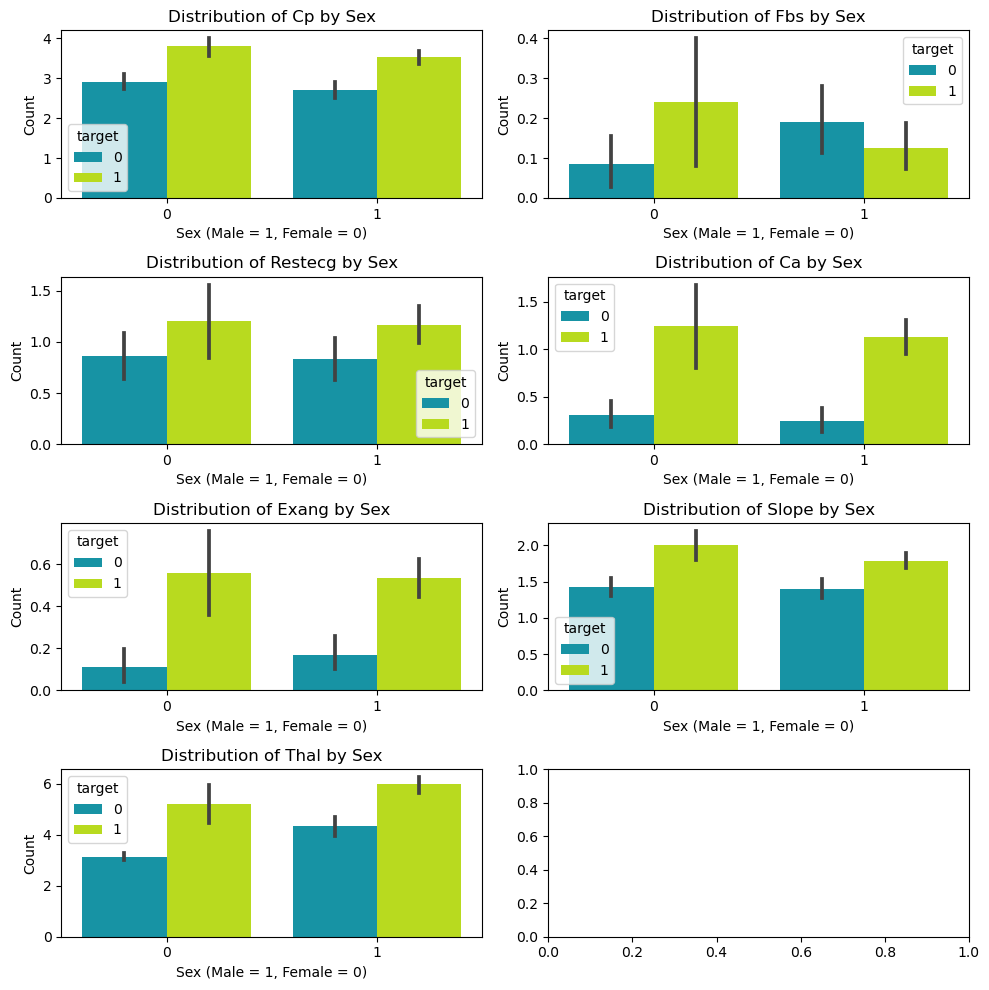

In [22]:
# filter out categorical variables
categorical_columns = ['cp', 'fbs', 'restecg', 'ca', 'exang', 'slope', 'thal']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

for i, column in enumerate(categorical_columns):
    # Calculate the row and column indices for the subplot
    row_index = i // 2
    col_index = i % 2
    
    # Plot barplot for 'sex' 
    sns.barplot(data=df, y=column, x='sex', hue='target', palette='nipy_spectral', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {column.capitalize()} by Sex')
    axes[row_index, col_index].set_xlabel('Sex (Male = 1, Female = 0)')
    axes[row_index, col_index].set_ylabel('Count')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [23]:
# Cross table (sex vs target)
gen = pd.crosstab(df['sex'],df['target'])
print (gen)

target   0    1
sex            
0       71   25
1       89  112


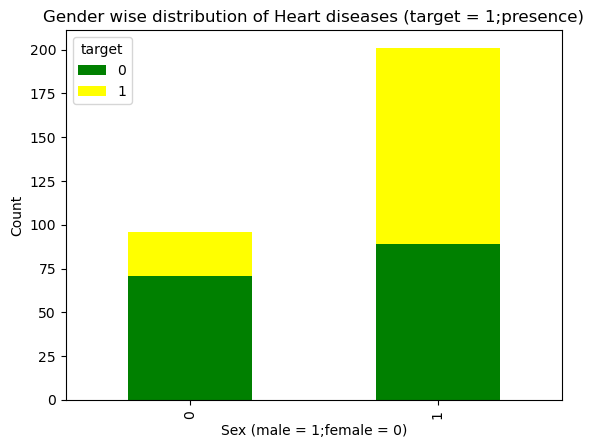

In [24]:
# Plot the bar chart with stack
gen.plot(kind = 'bar' ,stacked = True, color = ['green','yellow'], grid = False)
plt.title('Gender wise distribution of Heart diseases (target = 1;presence)')
plt.xlabel('Sex (male = 1;female = 0)')
plt.ylabel('Count')

# Display the plot
plt.show()

In [25]:
# Cross table (thal vs sex)
temp = pd.crosstab(index = df ['sex'], columns = [df['thal']])
temp

thal,3,6,7
sex,,,
0,80,1,15
1,84,17,100


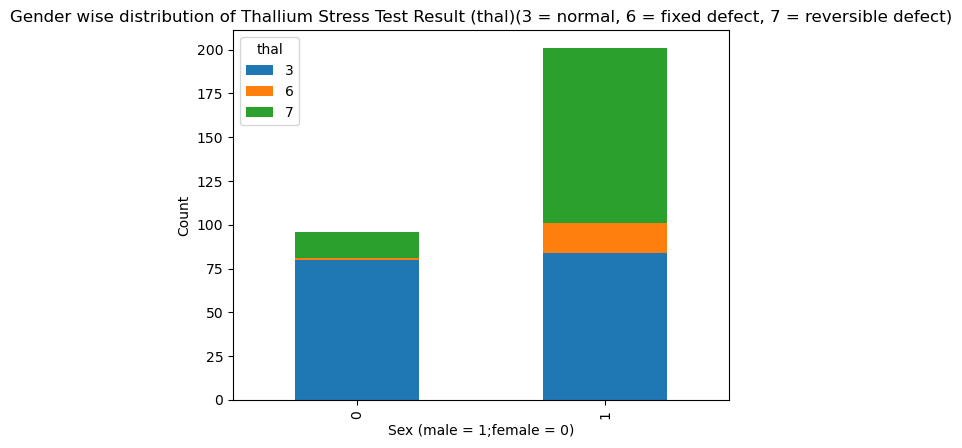

In [26]:
# Plot the bar chart with stack
temp.plot(kind='bar', stacked = True)
plt.title('Gender wise distribution of Thallium Stress Test Result (thal)(3 = normal, 6 = fixed defect, 7 = reversible defect)')
plt.xlabel('Sex (male = 1;female = 0)')
plt.ylabel('Count')

# Display the plot
plt.show()

In [27]:
# Cross table (thal vs target)
temp = pd.crosstab(index = df ['target'], columns = [df['thal']])
temp

thal,3,6,7
target,,,
0,127,6,27
1,37,12,88


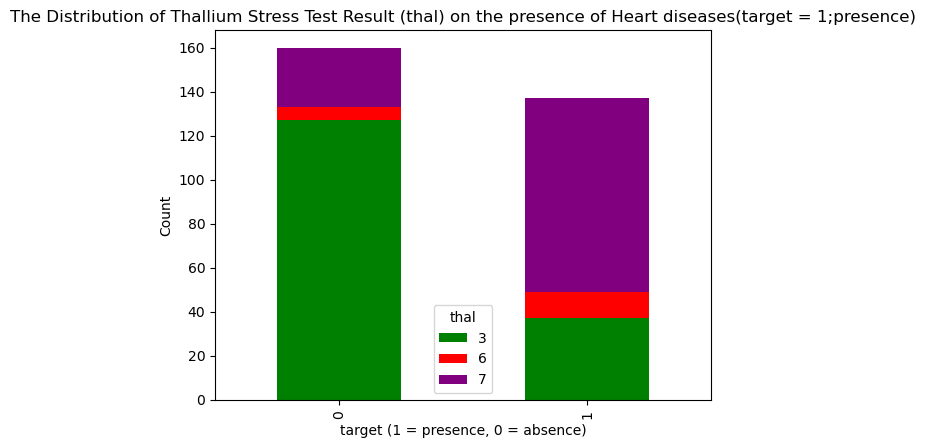

In [28]:
# Plot the bar chart with stack
temp.plot(kind='bar', stacked = True,color = ['green','red','purple'])
plt.title('The Distribution of Thallium Stress Test Result (thal) on the presence of Heart diseases(target = 1;presence)')
plt.xlabel('target (1 = presence, 0 = absence)')
plt.ylabel('Count')

# Display the plot
plt.show()

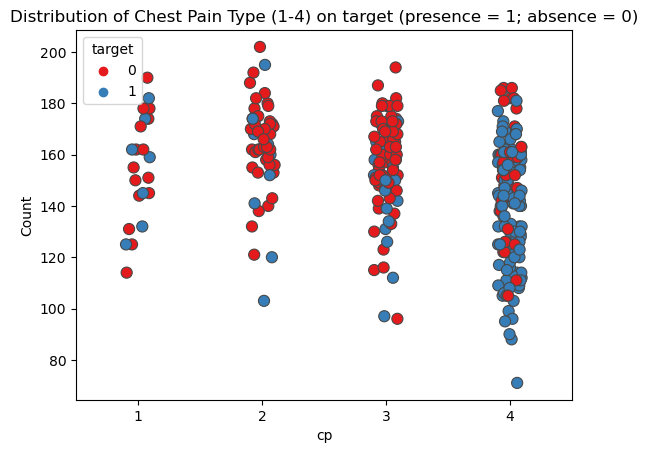

In [29]:
# Plot the stripplot
sns.stripplot(data=df ,x="cp", y="thalach", hue='target', linewidth=0.8, palette="Set1", size=8,color = ['purple','blue'])
plt.title('Distribution of Chest Pain Type (1-4) on target (presence = 1; absence = 0)')
plt.xlabel('cp')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Step 4.3 | Correlation categorical and Numerical (continuous) features

In [30]:
df['fbs'].value_counts()

fbs
0    254
1     43
Name: count, dtype: int64

In [31]:
df['chol'].value_counts()

chol
197    6
234    6
269    5
204    5
212    5
      ..
167    1
247    1
340    1
160    1
131    1
Name: count, Length: 152, dtype: int64

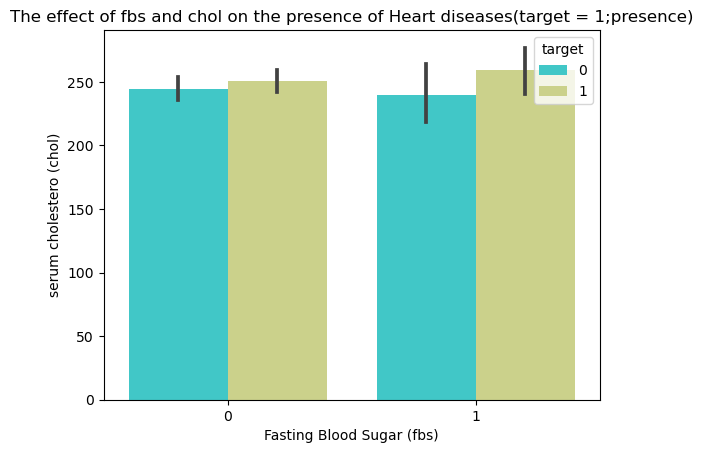

In [32]:
# Plot the bar chart
sns.barplot(data = df, x = 'fbs', y ='chol', hue ='target', palette = 'rainbow')
plt.title('The effect of fbs and chol on the presence of Heart diseases(target = 1;presence)')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('serum cholestero (chol)')

# Display the plot
plt.show()

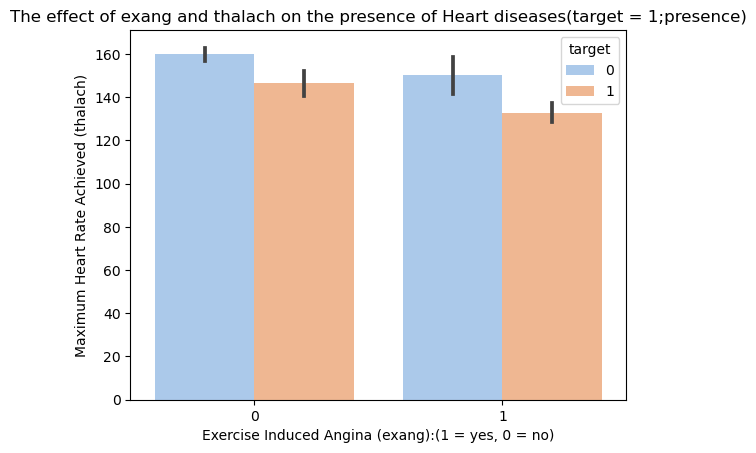

In [33]:
# Plot the bar chart
sns.barplot(data = df, x = 'exang', y ='thalach', hue ='target', palette = 'pastel')
plt.title('The effect of exang and thalach on the presence of Heart diseases(target = 1;presence)')
plt.xlabel('Exercise Induced Angina (exang):(1 = yes, 0 = no)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')

# Display the plot
plt.show()

## Machine Learning Model

### Step 1| Data Cleaning

In [34]:
# To find that the data is balanced or imbalanced, counting the target to make sure that the data set is balanced  
df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [35]:
# shape of the dataset
df.shape

(297, 14)

In [36]:
# find the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
# datatypes of each columns
df.dtypes

age           int32
sex           int32
cp            int32
trestbps      int32
chol          int32
fbs           int32
restecg       int32
thalach       int32
exang         int32
oldpeak     float64
slope         int32
ca            int32
thal          int32
target        int64
dtype: object

In [38]:
# columns are displayed
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Step 2| Label Encoding

In [39]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cl=['sex','cp', 'fbs', 'restecg', 'ca', 'exang', 'slope', 'thal','target']
for i in cl:
    df[i]=le.fit_transform(df[i])
df

C:\Users\hansaniY\AppData\Local\Temp\ipykernel_31020\3178396408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
C:\Users\hansaniY\AppData\Local\Temp\ipykernel_31020\3178396408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
C:\Users\hansaniY\AppData\Local\Temp\ipykernel_31020\3178396408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,3,140,241,0,0,123,1,0.2,1,0,2,1
298,45,1,0,110,264,0,0,132,0,1.2,1,0,2,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,2,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,2,1


In [40]:
# Seperating Input_labels and target from the dataset
x=df.iloc[:,:-1].values
x

array([[63.,  1.,  0., ...,  2.,  0.,  1.],
       [67.,  1.,  3., ...,  1.,  3.,  0.],
       [67.,  1.,  3., ...,  1.,  2.,  2.],
       ...,
       [68.,  1.,  3., ...,  1.,  2.,  2.],
       [57.,  1.,  3., ...,  1.,  1.,  2.],
       [57.,  0.,  1., ...,  1.,  1.,  0.]])

In [41]:
y=df.iloc[:,-1].values
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int6

### Step 3|  Training and testing

In [42]:
# split the data for Training and testing 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)


In [43]:
x_train

array([[61.,  1.,  3., ...,  0.,  1.,  2.],
       [57.,  1.,  3., ...,  1.,  1.,  1.],
       [48.,  1.,  1., ...,  2.,  0.,  2.],
       ...,
       [57.,  1.,  2., ...,  1.,  1.,  2.],
       [59.,  1.,  0., ...,  0.,  2.,  0.],
       [71.,  0.,  2., ...,  0.,  1.,  0.]])

In [44]:
x_test

array([[45.,  0.,  1., ...,  1.,  0.,  0.],
       [52.,  1.,  3., ...,  0.,  1.,  0.],
       [54.,  0.,  2., ...,  0.,  0.,  0.],
       ...,
       [55.,  0.,  3., ...,  1.,  0.,  0.],
       [42.,  1.,  2., ...,  2.,  0.,  2.],
       [59.,  1.,  3., ...,  2.,  0.,  2.]])

In [45]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [46]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

### Step 4 |Preprocessing : Scaling the dataset using SKLearn StandardScaler

In [47]:
#For this we could use either MinMaxScaler or StandardScaler here we use StandardScaler
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_nor=scaler.transform(x_train)
x_test_nor=scaler.transform(x_test)
print(x_train_nor)
print(x_test_nor)


[[ 0.72855974  0.66143783  0.84346533 ... -1.0091956   0.29894064
   1.21100968]
 [ 0.28302985  0.66143783  0.84346533 ...  0.6487686   0.29894064
   0.16651383]
 [-0.71941239  0.66143783 -1.23507423 ...  2.30673279 -0.73240456
   1.21100968]
 ...
 [ 0.28302985  0.66143783 -0.19580445 ...  0.6487686   0.29894064
   1.21100968]
 [ 0.5057948   0.66143783 -2.27434401 ... -1.0091956   1.33028584
  -0.87798202]
 [ 1.84238445 -1.51185789 -0.19580445 ... -1.0091956   0.29894064
  -0.87798202]]
[[-1.0535598  -1.51185789 -1.23507423 ...  0.6487686  -0.73240456
  -0.87798202]
 [-0.2738825   0.66143783  0.84346533 ... -1.0091956   0.29894064
  -0.87798202]
 [-0.05111756 -1.51185789 -0.19580445 ... -1.0091956  -0.73240456
  -0.87798202]
 ...
 [ 0.06026491 -1.51185789  0.84346533 ...  0.6487686  -0.73240456
  -0.87798202]
 [-1.38770721  0.66143783 -0.19580445 ...  2.30673279 -0.73240456
   1.21100968]
 [ 0.5057948   0.66143783  0.84346533 ...  2.30673279 -0.73240456
   1.21100968]]


In [48]:
x_test

array([[45.,  0.,  1., ...,  1.,  0.,  0.],
       [52.,  1.,  3., ...,  0.,  1.,  0.],
       [54.,  0.,  2., ...,  0.,  0.,  0.],
       ...,
       [55.,  0.,  3., ...,  1.,  0.,  0.],
       [42.,  1.,  2., ...,  2.,  0.,  2.],
       [59.,  1.,  3., ...,  2.,  0.,  2.]])

### Step 5| Model Creation

C:\Users\hansaniY\AppData\Local\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8357723577235772

Generation 2 - Current best internal CV score: 0.8357723577235772

Generation 3 - Current best internal CV score: 0.8360046457607433

Generation 4 - Current best internal CV score: 0.8360046457607433

Generation 5 - Current best internal CV score: 0.8360046457607433

Best pipeline: BernoulliNB(XGBClassifier(input_matrix, learning_rate=0.1, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0), alpha=10.0, fit_prior=False)
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        49
           1       0.83      0.83      0.83        41

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



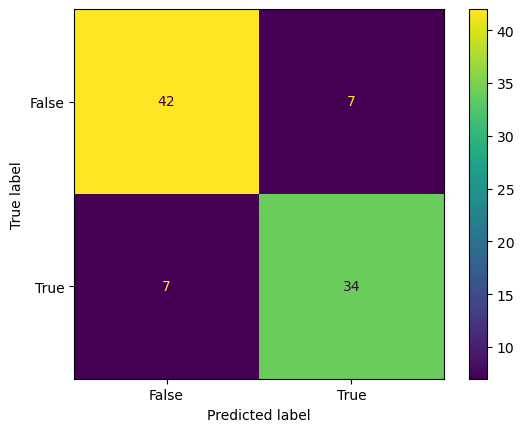

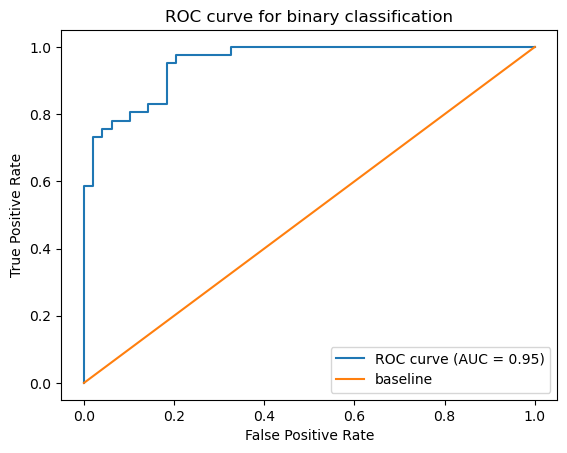

In [49]:
# Model creation and fit the models
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)
tp_model = tpot.fit(x_train_nor, y_train)

# Make predictions on the test set
y_pred = tp_model.predict(x_test_nor)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve, auc
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report and Confusion Matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels = [False,True])
cm_display.plot()
plt.show()

# Predict the probabilities of the positive class
y_pred = tp_model.predict_proba(x_test_nor)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the AUC score
accuracy_score = auc(fpr, tpr)
x2 = np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % accuracy_score)
plt.plot(x2,x2,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

## Other models

### LogisticRegression

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.90      0.85      0.88        41

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



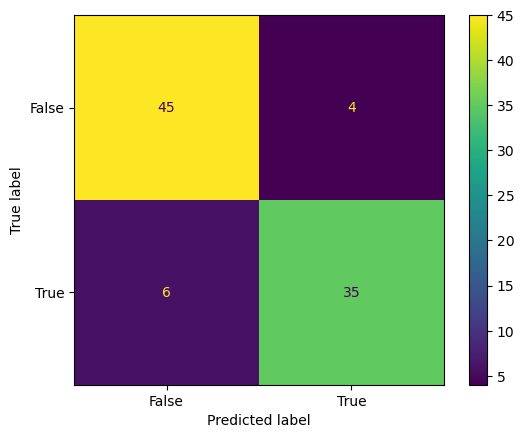

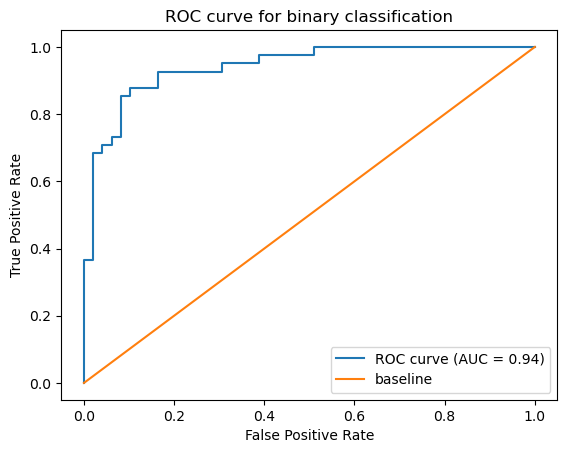

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Fit Logistic Regression Model
log_reg_clf = LogisticRegression(random_state=42)
log_reg_clf.fit(x_train_nor, y_train)

# Make predictions on the test set
y_pred = log_reg_clf.predict(x_test_nor)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report and Confusion Matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels = [False,True])
cm_display.plot()
plt.show()

# Predict the probabilities of the positive class
y_pred = log_reg_clf.predict_proba(x_test_nor)[:,1]
y_pred.shape

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the AUC score
accuracy_score = auc(fpr, tpr)
x2 = np.linspace(0,1,100)
# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % accuracy_score)
plt.plot(x2,x2,label='baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()
plt.show()

### RandomForestClassifier

Accuracy Score: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        49
           1       0.89      0.80      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



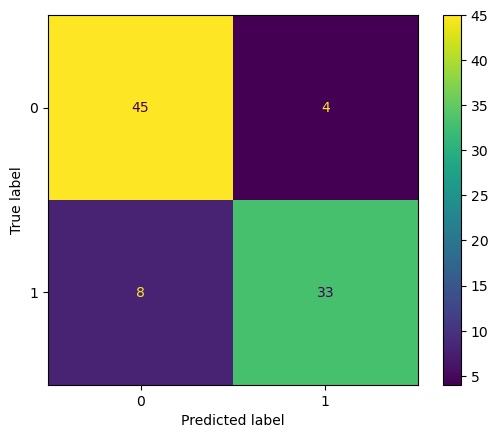

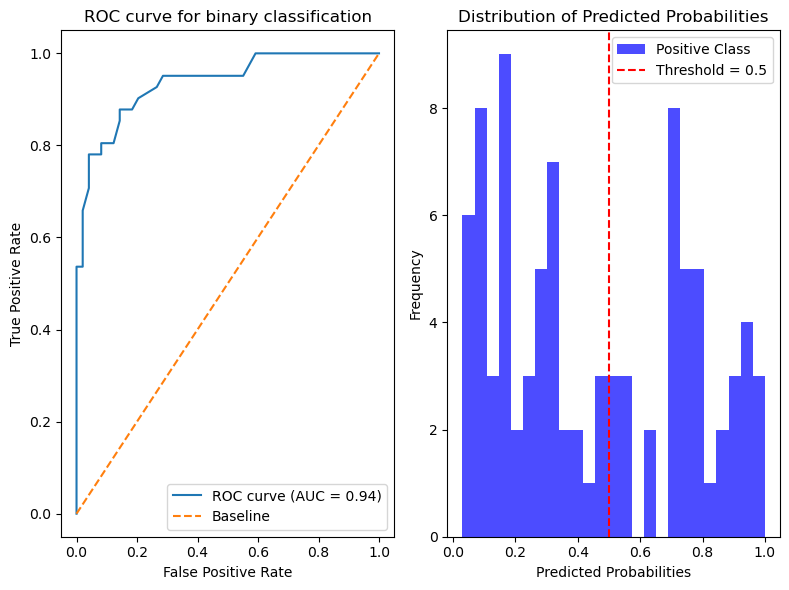

In [51]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have defined x_train_nor, y_train, x_test_nor, and y_test

# Create and train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_nor, y_train)

# Make predictions on the test set
y_pred_nb = model.predict(x_test_nor)

# Accuracy Score
accuracy_score_value = accuracy_score(y_test, y_pred_nb)
print("Accuracy Score:", accuracy_score_value)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix Visualization
matrix1 = confusion_matrix(y_test, y_pred_nb)
label = [0, 1]
cmd = ConfusionMatrixDisplay(matrix1, display_labels=label)
cmd.plot()

# Predict the probabilities of the positive class
y_pred_prob = model.predict_proba(x_test_nor)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
accuracy_score_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % accuracy_score_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()

# Plot AUC
plt.subplot(1, 2, 2)
plt.hist(y_pred_prob, bins=25, alpha=0.7, color='blue', label='Positive Class')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()

plt.tight_layout()
plt.show()

### K-Nearest Neighbors (KNN)

Accuracy Score: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.92      0.85      0.89        41

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



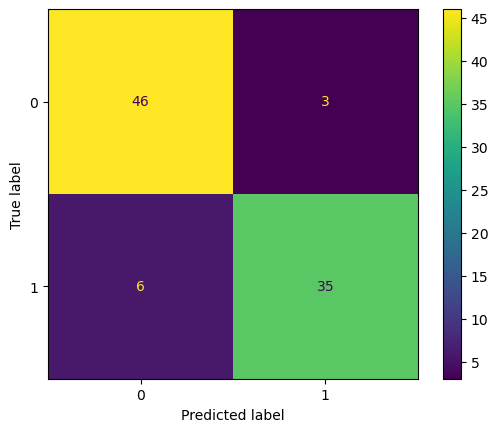

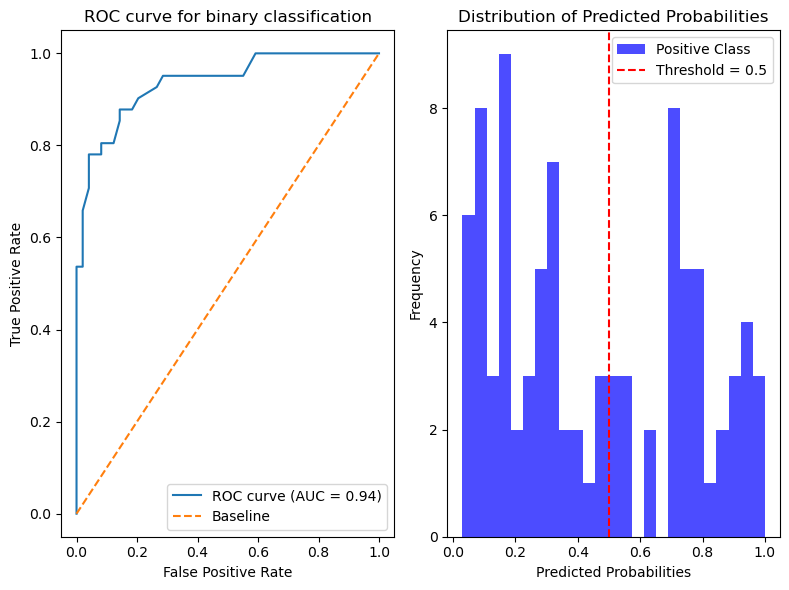

In [52]:
# import knn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve, auc


knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_nor,y_train)
y_pred_knn=knn.predict(x_test_nor)
y_pred_knn

# Accuracy Score
accuracy_score_value = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score:", accuracy_score_value)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix Visualization
matrix1 = confusion_matrix(y_test, y_pred_knn)
label = [0, 1]
cmd = ConfusionMatrixDisplay(matrix1, display_labels=label)
cmd.plot()

# Predict the probabilities of the positive class
y_pred_prob = model.predict_proba(x_test_nor)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
accuracy_score_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % accuracy_score_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()

# Plot AUC
plt.subplot(1, 2, 2)
plt.hist(y_pred_prob, bins=25, alpha=0.7, color='blue', label='Positive Class')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()

plt.tight_layout()
plt.show()

### Support Vector Machine (SVM)

Accuracy Score: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        49
           1       0.76      0.39      0.52        41

    accuracy                           0.67        90
   macro avg       0.70      0.64      0.63        90
weighted avg       0.69      0.67      0.64        90



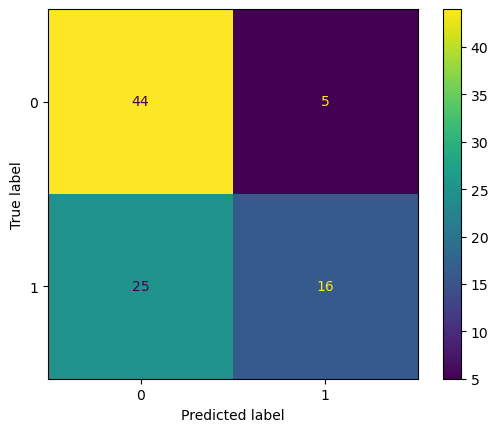

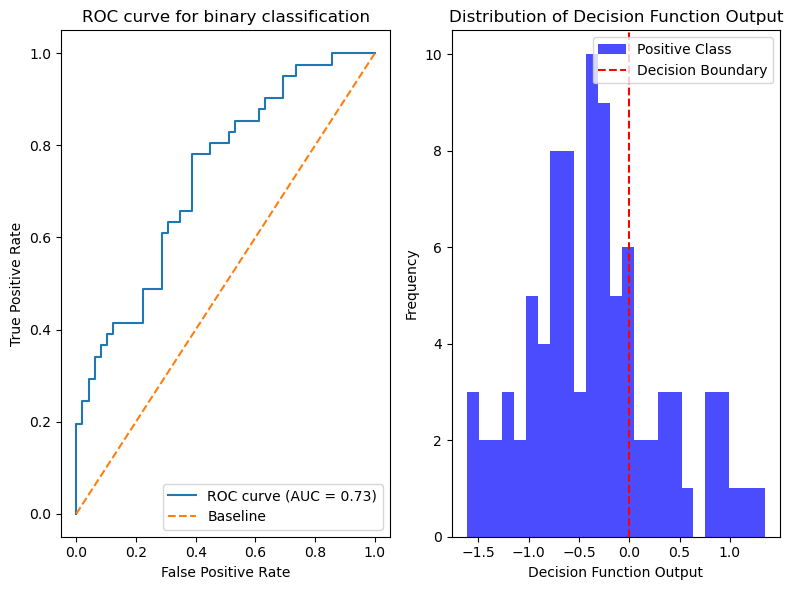

In [53]:
# Import SVM libraries
from sklearn.svm import SVC

# Create and train the SVM model
model = SVC(probability=True)  # Setting probability to True for later ROC curve
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svc = model.predict(x_test)

# Accuracy Score
accuracy_score_value = accuracy_score(y_test, y_pred_svc)
print("Accuracy Score:", accuracy_score_value)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Confusion Matrix Visualization
matrix1 = confusion_matrix(y_test, y_pred_svc)
label = [0, 1]
cmd = ConfusionMatrixDisplay(matrix1, display_labels=label)
cmd.plot()

# If you want to calculate ROC and AUC, you need to use decision_function instead of predict_proba
y_pred_decision = model.decision_function(x_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)

# Calculate the AUC score
accuracy_score_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % accuracy_score_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for binary classification")
plt.legend()

# Plot AUC
plt.subplot(1, 2, 2)
plt.hist(y_pred_decision, bins=25, alpha=0.7, color='blue', label='Positive Class')
plt.axvline(0, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Decision Function Output")
plt.ylabel("Frequency")
plt.title("Distribution of Decision Function Output")
plt.legend()

plt.tight_layout()
plt.show()